Machine Learnig Bootcamp
HomeWork 3

Getting the data,
For this Homework,

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')



In [68]:
Data.info()
Data.head()
Data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


(1462, 9)

Data preparation<br>
Check if the missing values are presented in the features.<br>
If there are missing values:<br>
For caterogiral features, replace them with 'NA'<br>
For numerical features, replace with with 0.0<br>

In [69]:
missing_values = Data.isnull().sum().loc[lambda x : x > 0].shape[0]
print(f'The number of features with missing values is {missing_values}')
Data.isnull().sum()

The number of features with missing values is 5


lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

Filling value

In [70]:
if missing_values > 0:
    categorical = Data.select_dtypes(include=['object']).columns
    numerical = Data.select_dtypes(include=['number']).columns

    Data[categorical] = Data[categorical].fillna('NA')
    Data[numerical] = Data[numerical].fillna(0.0)

In [71]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical_corr = ['number_of_courses_viewed', 'interaction_count', 'lead_score', 'annual_income']

Question 1
What is the most frequent observation (mode) for the column industry?<br>

NA<br>
technology<br>
healthcare<br>
retail<br>

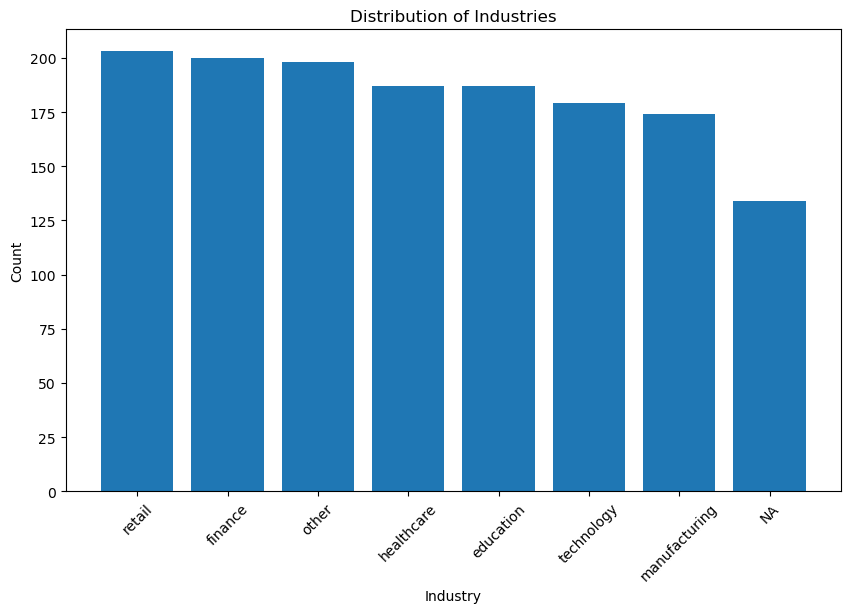

In [72]:
plt.figure(figsize=(10,6))
plt.bar(Data['industry'].value_counts().index, Data['industry'].value_counts().values)
plt.xticks(rotation=45)
plt.title('Distribution of Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()
q1 = Data['industry'].mode()[0]

In [73]:
print(f'The most frequent observation (mode) for the column industry is: {q1}')

The most frequent observation (mode) for the column industry is: retail


Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.<br>

What are the two features that have the biggest correlation?<br>

interaction_count and lead_score<br>
number_of_courses_viewed and lead_score<br>
number_of_courses_viewed and interaction_count<br>
annual_income and interaction_count<br>
Only consider the pairs above when answering this question.<br>

In [74]:
Data.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [75]:
corr_matrix = Data[numerical_corr].corrwith(Data.converted)

In [76]:

print(corr_matrix)

number_of_courses_viewed    0.435914
interaction_count           0.374573
lead_score                  0.193673
annual_income               0.053131
dtype: float64


In [77]:
print("Answer of q2 is : number_of_courses_viewed and interaction_count.")

Answer of q2 is : number_of_courses_viewed and interaction_count.


Split the data<br>
Split your data in train/val/test sets with 60%/20%/20% distribution.<br>
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.<br>
Make sure that the target value y is not in your dataframe.<br>

In [78]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(Data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [79]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [80]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [81]:
y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test = df_test['converted'].values


In [82]:
len(y_train)

876

In [83]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

Question 3<br>
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.<br>
Round the scores to 2 decimals using round(score, 2).<br>
Which of these variables has the biggest mutual information score?<br>

industry<br>
location<br>
lead_source<br>
employment_status<br>

In [84]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98
...,...,...,...,...,...,...,...,...
871,organic_search,other,1,43907.0,employed,australia,4,0.33
872,social_media,retail,3,64969.0,employed,north_america,1,0.18
873,NA,education,3,89042.0,employed,asia,4,0.75
874,social_media,manufacturing,1,0.0,self_employed,europe,1,0.65


In [85]:
from sklearn.metrics import mutual_info_score
categorical
def mi_scores(series):
    return mutual_info_score(series, y_train)


mi_result = df_train[categorical].apply(mi_scores).round(2)
mi_result = mi_result.sort_values(ascending=False).to_frame(name='MI')
mi_result
q3 = mi_result.index[0]

In [86]:
print(f'Answer of question no 3 is : { q3} ')

Answer of question no 3 is : lead_source 


Question 4<br>
Now let's train a logistic regression.<br>
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.<br>
Fit the model on the training dataset.<br>
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:<br>
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)<br>
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.<br>
What accuracy did you get?<br>

0.64<br>
0.74<br>
0.84<br>
0.94<br>

In [87]:
numerical

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score', 'converted'],
      dtype='object')

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

train_dicts = df_train[categorical + numerical_corr].to_dict(orient ='records')
train_dicts


[{'lead_source': 'paid_ads',
  'industry': 'retail',
  'employment_status': 'student',
  'location': 'middle_east',
  'number_of_courses_viewed': 0,
  'interaction_count': 5,
  'lead_score': 0.03,
  'annual_income': 58472.0},
 {'lead_source': 'organic_search',
  'industry': 'manufacturing',
  'employment_status': 'student',
  'location': 'middle_east',
  'number_of_courses_viewed': 3,
  'interaction_count': 6,
  'lead_score': 0.77,
  'annual_income': 71738.0},
 {'lead_source': 'paid_ads',
  'industry': 'technology',
  'employment_status': 'employed',
  'location': 'north_america',
  'number_of_courses_viewed': 3,
  'interaction_count': 2,
  'lead_score': 0.59,
  'annual_income': 81973.0},
 {'lead_source': 'NA',
  'industry': 'technology',
  'employment_status': 'employed',
  'location': 'europe',
  'number_of_courses_viewed': 1,
  'interaction_count': 3,
  'lead_score': 0.34,
  'annual_income': 74956.0},
 {'lead_source': 'organic_search',
  'industry': 'retail',
  'employment_status': 

In [89]:
dv = DictVectorizer(sparse=False)

In [90]:
X_train = dv.fit_transform(train_dicts)

In [91]:
val_dicts  = df_val[categorical + numerical_corr].to_dict(orient = 'records')

In [92]:
X_val = dv.fit_transform(val_dicts)

In [93]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [94]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)


In [95]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [96]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [97]:
y_val_predict = model.predict(X_val)

In [98]:
val_accuracy = round(accuracy_score(y_val, y_val_predict), 2)
print("Answer of question 4 is :", val_accuracy)

Answer of question 4 is : 0.7


Question 5<br>
Let's find the least useful feature using the feature elimination technique.<br>
Train a model using the same features and parameters as in Q4 (without rounding).<br>
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.<br>
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.<br>
Which of following feature has the smallest difference?<br>
<br>
'industry'<br>
'employment_status'<br>
'lead_score'<br>
Note: The difference doesn't have to be positive.<br>

In [104]:
feature_names = dv.get_feature_names_out()
feature_names

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [107]:
f_train_pd = pd.DataFrame(X_train,columns=feature_names)
f_val_pd = pd.DataFrame(X_val,columns=feature_names)

In [113]:
df_train


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98
...,...,...,...,...,...,...,...,...
871,organic_search,other,1,43907.0,employed,australia,4,0.33
872,social_media,retail,3,64969.0,employed,north_america,1,0.18
873,NA,education,3,89042.0,employed,asia,4,0.75
874,social_media,manufacturing,1,0.0,self_employed,europe,1,0.65


In [116]:
type(df_train)

pandas.core.frame.DataFrame

In [129]:
feature = ['industry','employment_status','lead_score']
result = {}
one = {}

for f in feature:
    cols_to_drop = [col for col in f_train_pd.columns if col.startswith(f)]
    
    X_train_feature = f_train_pd.drop(columns=cols_to_drop)
    X_val_feature = f_val_pd.drop(columns=cols_to_drop)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_feature, y_train)
    y_pred = model.predict(X_val_feature)
    accuracy = accuracy_score(y_val, y_pred)
    one[f] = accuracy 

    result[f] = val_accuracy - accuracy 

print("Accuracy difference for each feature:")
print(result)
print("Accuracy for each feature :")
print(one)

least_useful = min(result, key=result.get)
print("Least useful feature:", least_useful)


Accuracy difference for each feature:
{'industry': 0.0003412969283276279, 'employment_status': 0.003754266211604018, 'lead_score': -0.006484641638225264}
Accuracy for each feature :
{'industry': 0.6996587030716723, 'employment_status': 0.6962457337883959, 'lead_score': 0.7064846416382252}
Least useful feature: lead_score


Question 6<br>
Now let's train a regularized logistic regression.<br>
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].<br>
Train models using all the features as in Q4.<br>
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.<br>
Which of these C leads to the best accuracy on the validation set?<br>
<br>
0.01<br>
0.1<br>
1<br>
10<br>
100<br>
Note: If there are multiple options, select the smallest C.<br>

In [131]:
C_value = [0.01,0.1,1,10,100]
result_c = {}

for c in C_value:
    model  = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)

    model.fit(f_train_pd,y_train)

    y_pred_c = model.predict(f_val_pd)

    accuracy_c = round(accuracy_score(y_val,y_pred_c),3)
    result_c[c] = accuracy_c

print("best accuracy on the validation set")
print(result_c)

best accuracy on the validation set
{0.01: 0.7, 0.1: 0.7, 1: 0.7, 10: 0.7, 100: 0.7}


HomeWork 3 is complete!!